# Import

In [4]:
import glob
import pandas as pd
from pycaret.classification import *

# Data Preprocessing

Combine training .tsv files into a Pandas DataFrame. Merge them on column `PATIENTID`.

In [5]:
path_train = '/home/kevin/Code/precisionFDA/Data/Brain-Cancer-Data/Training-Dataset'
all_files = glob.glob(path_train + '/*.tsv')

df_train = pd.DataFrame()

for file in all_files:
    df_current_train = pd.read_csv(file, sep='\t')

    if df_train.empty:
        df_train = df_current_train
    else:
        df_train = pd.merge(df_train, df_current_train, how='outer', on='PATIENTID')

In [6]:
df_train.head()

,PATIENTID,SURVIVAL_STATUS,SEX,RACE,WHO_GRADING,CANCER_TYPE,A1BG,A1BG.AS1,A1CF,A2M,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,1,,NaN,II,ASTROCYTOMA,6.557793,6.453623,5.302909,12.530607,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,1,,NaN,NaN,GBM,6.323015,6.305724,5.552097,13.000489,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,1,,NaN,III,ASTROCYTOMA,6.669421,6.414214,5.478774,12.545510,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,1,,NaN,NaN,UNCLASSIFIED,6.502573,6.508156,5.648495,12.407083,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,1,,NaN,NaN,GBM,6.624505,6.911232,5.614099,10.777103,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522


Find columns that have NaN or empty values.

In [7]:
list_empty_null = df_train.columns[df_train.isna().any()].tolist()
print (list_empty_null)

['SEX', 'RACE', 'WHO_GRADING']


Replace empty values with NaN and then drop all rows that have NaN. Check for nulls.

In [8]:
df_train.replace(' ', pd.NA, inplace=True)
df_train.dropna(subset=['SEX', 'RACE', 'WHO_GRADING'], inplace=True)
df_train[['SEX', 'RACE', 'WHO_GRADING']].isnull().sum()

SEX            0
RACE           0
WHO_GRADING    0
dtype: int64

In the `CANCER_TYPE` column, drop rows with `UNKNOWN` and `UNCLASSIFIED` values.

In [9]:
df_train['CANCER_TYPE'].replace({'UNKNOWN':pd.NA}, inplace=True)
df_train['CANCER_TYPE'].replace({'UNCLASSIFIED':pd.NA}, inplace=True)
df_train.dropna(subset=['CANCER_TYPE'], inplace=True)

Reset DataFrame index.

In [10]:
df_train.reset_index(drop=True, inplace=True)

# Train Model

In `setup()`, set the `target` to `SURVIVAL_STATUS` and ignore `PATIENTID` column.

In [11]:
s = setup(
    df_train, 
    target='SURVIVAL_STATUS', 
    ignore_features=['PATIENTID'], 
    session_id=1)

,Description,Value
0,Session id,1
1,Target,SURVIVAL_STATUS
2,Target type,Binary
3,Original data shape,"(165, 19341)"
4,Transformed data shape,"(165, 19349)"
5,Transformed train set shape,"(115, 19349)"
6,Transformed test set shape,"(50, 19349)"
7,Ignore features,1
8,Numeric features,19335
9,Categorical features,4


Find the best model and save it.

In [67]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8886,0.0000,1.0000,0.8861,0.9388,0.2866,0.3016,35.8340
et,Extra Trees Classifier,0.8879,0.0000,1.0000,0.8855,0.9384,0.2871,0.3019,36.1710
lda,Linear Discriminant Analysis,0.8795,0.7839,0.9800,0.8921,0.9327,0.2987,0.3226,25.0900
lightgbm,Light Gradient Boosting Machine,0.8788,0.0000,0.9900,0.8855,0.9332,0.2491,0.2690,57.3890
ridge,Ridge Classifier,0.8629,0.6800,0.9589,0.8890,0.9211,0.2760,0.2857,25.4010
ada,Ada Boost Classifier,0.8629,0.8044,0.9600,0.8921,0.9232,0.2516,0.2646,26.3610
dummy,Dummy Classifier,0.8530,0.0000,1.0000,0.8530,0.9203,0.0000,0.0000,37.0920
lr,Logistic Regression,0.8455,0.7783,0.9378,0.8858,0.9088,0.2528,0.2644,25.6820
gbc,Gradient Boosting Classifier,0.8455,0.7028,0.9178,0.9011,0.9085,0.3233,0.3280,30.7820
nb,Naive Bayes,0.8447,0.0000,0.8878,0.9302,0.9054,0.3945,0.4110,37.3830


In [ ]:
save_model(best_model, 'best_model_v3')

In [ ]:
my_model = load_model('best_model_v3')

Evaluate the model.

In [14]:
evaluate_model(my_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

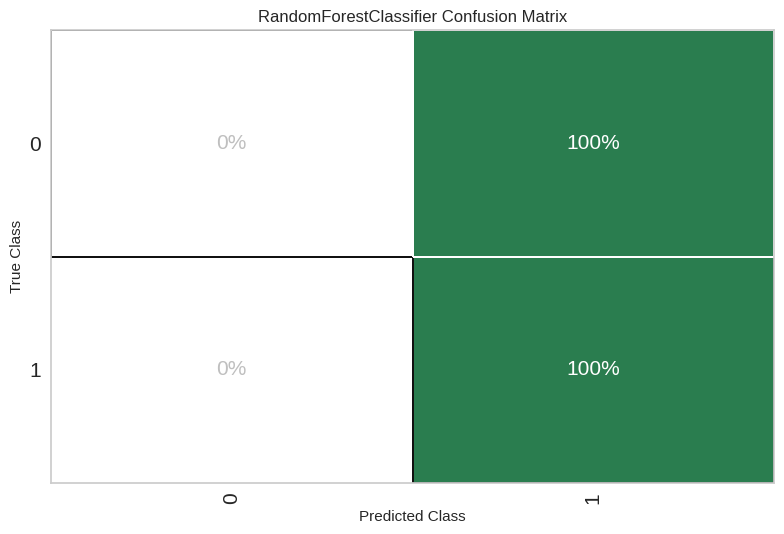

In [13]:
plot_model(my_model, plot='confusion_matrix', plot_kwargs={'percent':True})

# Test Model

## Training Dataset

Predict on the training dataset.

In [19]:
predict_train = predict_model(my_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8400,0.4673,1.0000,0.8400,0.9130,0.0000,0.0000


## Test Dataset

Combine test .tsv files into a Pandas DataFrame. Merge them on column `PATIENTID`.

In [21]:
path_test = '/home/kevin/Code/precisionFDA/Data/Brain-Cancer-Data/Test-Dataset'

all_files = glob.glob(path_test + '/*.tsv')

df_test = pd.DataFrame()

for file in all_files:
    df_current_test = pd.read_csv(file, sep='\t')

    if df_test.empty:
        df_test = df_current_test
    else:
        df_test = df_test.merge(df_current_test, how='outer', on='PATIENTID')

In [22]:
df_test.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_54,6.552369,6.516572,5.670704,12.696699,6.244980,5.494503,7.031448,6.186457,6.245582,...,7.453650,6.016575,8.809521,9.755064,8.466902,8.261902,,NaN,II,OLIGODENDROGLIOMA
1,patient_456,6.341531,6.403964,5.575675,11.667261,6.208729,5.516190,7.077214,6.096601,6.406412,...,7.735993,6.054752,9.034913,9.474861,8.680185,8.380745,,NaN,NaN,OLIGODENDROGLIOMA
2,patient_484,6.150328,6.452206,5.465605,12.384793,5.971820,5.339407,6.787843,6.217803,6.311967,...,7.710260,6.034905,9.327712,11.646340,8.511510,8.710605,,NaN,NaN,GBM
3,patient_441,6.569596,6.428329,5.404905,12.918034,5.915066,5.295160,6.975057,6.054217,6.471112,...,7.749354,6.056110,9.418540,12.472090,8.651621,8.839366,,NaN,NaN,GBM
4,patient_370,6.902578,6.343173,5.243564,13.215173,6.058236,5.203713,6.786196,6.035803,6.118639,...,7.444628,5.878318,9.493086,10.977615,8.479319,8.829912,,NaN,NaN,GBM


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 19340 entries, PATIENTID to CANCER_TYPE
dtypes: float64(19335), object(5)
memory usage: 14.2+ MB


Predict on the test dataset.

In [31]:
predict_test = predict_model(my_model, df_test)
predict_test['prediction_score'].describe()

count    96.000000
mean      0.830417
std       0.115375
min       0.520000
25%       0.780000
50%       0.850000
75%       0.922500
max       0.990000
Name: prediction_score, dtype: float64